# Column Transformer

                    In Dataset each column have their own problem like in 1 column we have missing data, other column we need to scale and another column have categorical data. So to handle all of these columns are very difficult task.

                    For e.g.:- we have a dataset in which columns are Age, City, Gender and Review. In Age column we have 20 value missing, In City and Gender Columns are Nominal Data and In Review (Good, Bad or Excellent) column we have ordinal data. So we have to apply Simple Imputer on Age column, OneHot Encoding on City and Gender column and Ordinal Encoding on Review column. And after that Simple Imputer Return 1 Numpy Arrary, OneHot Encoding Return other Numpy Array and Ordinal Encoding return another Numpy Arrary. And after that we need to merge all of three numpy array to convert into one array which also a big one array.

                    So it is too lengthy process to do above steps. So to reduce these trouble we can use "Column Transformer"                    

                    Class of Scikit-Learn :- ColumnTransformer (with the help of this class the above steps we can do in a single line of code.)




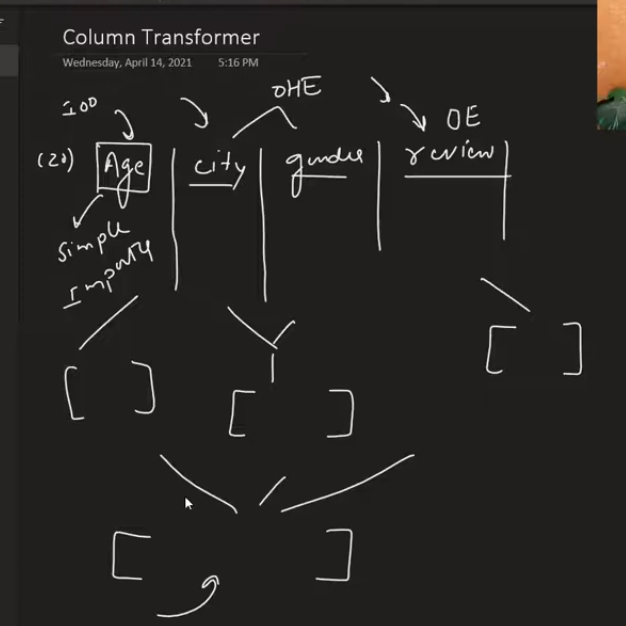

In [6]:
# for Importing Column Transformer Images into VS Code
from IPython.display import Image

Image('Column Transformer.png')

In [7]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [8]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

In [9]:
df = pd.read_csv('covid_toy.csv')

In [10]:
df.head()

,age,gender,fever,cough,city,has_covid
0,60,Male,103.0,Mild,Kolkata,No
1,27,Male,100.0,Mild,Delhi,Yes
2,42,Male,101.0,Mild,Delhi,No
3,31,Female,98.0,Mild,Kolkata,No
4,65,Female,101.0,Mild,Mumbai,No


In [12]:
df['cough'].value_counts()

cough
Mild      62
Strong    38
Name: count, dtype: int64

In [13]:
df['city'].value_counts()

city
Kolkata      32
Bangalore    30
Delhi        22
Mumbai       16
Name: count, dtype: int64

In [14]:
df.isnull().sum()

age           0
gender        0
fever        10
cough         0
city          0
has_covid     0
dtype: int64

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['has_covid']), df['has_covid'], test_size=0.2)

## Normal Steps 

In [15]:
# Adding simple imputer to fever column

si = SimpleImputer()

X_train_fever = si.fit_transform(X_train[['fever']])

# also the test data

X_test_fever = si.fit_transform(X_test[['fever']])

X_train_fever.shape

(80, 1)

In [17]:
# OrdinalEncoding --> cough

oe = OrdinalEncoder(categories=[['Mild','Strong']])

X_train_cough = oe.fit_transform(X_train[['cough']])

# also the test data

X_test_cough = oe.fit_transform(X_test[['cough']])

X_train_cough.shape

(80, 1)

In [19]:
# OneHotEncoding --> gender, city

# drop='first' is used to remove first column to protect from multi colinearity

ohe = OneHotEncoder(drop='first', sparse=False)

X_train_gender_city = ohe.fit_transform(X_train[['gender','city']])

# also the test data

X_test_gender_city = ohe.fit_transform(X_test[['gender','city']])

X_train_gender_city.shape

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(80, 4)

In [20]:
# Extracting Age

X_train_age = X_train.drop(columns=['gender','fever','cough','city']).values

# also the test data

X_test_age = X_test.drop(columns=['gender','fever','cough','city']).values

X_train_age.shape

(80, 1)

In [21]:
X_train_transformed = np.concatenate((X_train_age, X_train_fever, X_train_gender_city, X_train_cough), axis=1)

# also the test data

X_test_transformed = np.concatenate((X_test_age, X_test_fever, X_test_gender_city, X_test_cough), axis=1)

X_train_transformed.shape

(80, 7)

## With the Help of Column Transformer

In [22]:
from sklearn.compose import ColumnTransformer

#### Note:- While creating a transformer we have to provide transformer list or remaindre parameter. In Transformer parameter we have to provide data in tuple inside the list. In tuple we have to provide three things 1st is Transformer Name, 2nd is Transformer Operation and 3rd is column name inside the list on which operation is going to be performed. 

In [25]:
# remainder have 2 option 1st is 'drop' (drop the column) and 2nd is 'passthrough' (leave it as it as in dataset)

transformer = ColumnTransformer(transformers=[
    ('tnf1', SimpleImputer(), ['fever']),
    ('tnf2', OrdinalEncoder(categories=[['Mild','Strong']]), ['cough']),
    ('tnf3', OneHotEncoder(drop='first', sparse=False), ['gender', 'city'])
], remainder='passthrough')

In [27]:
transformer.fit_transform(X_train).shape

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


(80, 7)

In [31]:
transformer.transform(X_test).shape

(20, 7)